# **Final Round FIT Competition 2024**
---
### **Bismillah Dulu**
- Amira Ghina Nurfansepta
- Shania Edina

## **Data Understanding**

Data understanding involves comprehensively exploring and analyzing a dataset to gain insights into its structure, characteristics, and potential issues. This process helps identify patterns, relationships, and anomalies, which are crucial for informed decision-making in data-driven projects.

### **Features**
- **data_id** - ID of the city data
- **city_name** - Name of a city in a certain country
- **year** - Year of data recorded
- **population** - Number of residents in a particular city
- **human_development_index** - Index of human development in a particular city (0-100)
- **mobility_index** - Index of traffic congestion and total public transports in a particular city (0-100)
- **air_quality_index** - Index based on air pollution level in a particular city (0-100)
- **energy_consumption_index** - Index of energy consumption such as water and electricity in a particular city (0-100)
- **education_index** - Index based on children have access to a school in a particular city (0-100)
- **school_life_expectancy** - Expected years of schooling for a child in a particular city
- **healthcare_index** - Index of basic sanitation and total medical services in a particular city (0-100)
- **life_expectancy** - Human life expectancy in years in a particular city
- **income_inequality_index** - Index based on gini coefficient in a particular city (0-100)
- **employment_rate** - Percentage of finding a job in a particular city (0-100)
- **governance_index** - Index of goverment quality in a particular city (0-100)
- **safety_index** - Index based on public safety in a particular city (0-100)
- **internet_quality_index** - Index based on average internet speed per mbps in a particular city (0-100)
- **city_development_index** - Index of city development based on factors within the city (0-100)


### **Import Library**
Install and import the required libraries.

In [496]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [497]:
pip install ngboost

Note: you may need to restart the kernel to use updated packages.


In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from ngboost import NGBRegressor
from mlxtend.regressor import StackingRegressor

from sklearn.metrics import mean_squared_error

### **Import Dataset**

Import dataset to view existing data.

In [499]:
train_df = pd.read_csv('/kaggle/input/final-fit-competition-2024/train.csv')
train_df.head()

,data_id,city_name,country_id,year,population,human_development_index,mobility_index,air_quality_index,energy_consumption_index,education_index,school_life_expectancy,healthcare_index,life_expectancy,income_inequality_index,employment_rate,governance_index,safety_index,internet_quality_index,city_development_index
0,C1_2014,Aba,NGA,2014-2015,918263,55.93,69.44,48.15,88.33,55.74,8,70.94,56,41.11,55.64,65.10,49.82,52.02,59.63
1,C2_2014,Abidjan,CIV,2014-2015,4410752,50.53,45.58,66.18,54.25,43.97,7,62.11,63,45.52,57.53,59.60,60.71,50.24,54.57
2,C3_2014,Abobo,CIV,2014-2015,822165,55.61,67.28,47.98,45.74,49.30,7,69.85,58,47.67,40.87,55.01,55.78,47.87,52.74
3,C4_2014,Abomey Calavi,BEN,2014-2015,708578,60.12,48.04,51.90,41.53,68.39,10,60.11,51,51.86,54.92,67.21,41.42,57.55,54.29
4,C5_2014,Abu Dhabi,ARE,2014-2015,1138076,76.02,75.86,61.68,67.35,82.71,12,83.28,73,62.08,74.39,71.63,74.15,52.22,70.54


In [500]:
test_df = pd.read_csv('/kaggle/input/final-fit-competition-2024/test.csv')
test_df.head()

,data_id,city_name,country_id,year,population,human_development_index,mobility_index,air_quality_index,energy_consumption_index,education_index,school_life_expectancy,healthcare_index,life_expectancy,income_inequality_index,employment_rate,governance_index,safety_index,internet_quality_index
0,C801_2014,Shimkent,KAZ,2014-2015,797426,62.30,20.91,39.79,59.09,64.08,10,73.96,59,48.85,34.05,47.69,63.81,44.19
1,C802_2014,Shiraz,IRN,2014-2015,1517029,62.39,40.33,42.92,57.18,50.35,8,64.76,55,72.05,57.08,61.20,58.10,54.69
2,C803_2014,Shiyan,CHN,2014-2015,1015370,57.58,69.05,51.25,64.45,58.25,9,55.68,54,58.80,70.04,53.67,54.78,54.10
3,C804_2014,Shizuoka,JPN,2014-2015,2816484,48.56,55.00,49.30,50.70,37.55,6,66.28,55,41.84,29.83,65.40,49.25,55.72
4,C805_2014,Sialkot,PAK,2014-2015,615115,64.41,40.30,51.19,46.80,48.89,7,67.00,60,77.35,55.52,48.92,60.54,50.79


### **Number of Rows and Columns**

Knowing how many rows and columns of each data.

In [501]:
print("Number of rows =", train_df.shape[0])
print("Number of columns =", train_df.shape[1])

Number of rows = 8000
Number of columns = 19


In [502]:
print("Number of rows =", test_df.shape[0])
print("Number of columns =", test_df.shape[1])

Number of rows = 2000
Number of columns = 18


### **Data Information**
Knowing the data type and missing values in each data.

In [503]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data_id                   8000 non-null   object 
 1   city_name                 8000 non-null   object 
 2   country_id                8000 non-null   object 
 3   year                      8000 non-null   object 
 4   population                8000 non-null   int64  
 5   human_development_index   8000 non-null   float64
 6   mobility_index            8000 non-null   float64
 7   air_quality_index         8000 non-null   float64
 8   energy_consumption_index  8000 non-null   float64
 9   education_index           8000 non-null   float64
 10  school_life_expectancy    8000 non-null   int64  
 11  healthcare_index          8000 non-null   float64
 12  life_expectancy           8000 non-null   int64  
 13  income_inequality_index   7990 non-null   float64
 14  employme

In [504]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data_id                   2000 non-null   object 
 1   city_name                 2000 non-null   object 
 2   country_id                2000 non-null   object 
 3   year                      2000 non-null   object 
 4   population                2000 non-null   int64  
 5   human_development_index   2000 non-null   float64
 6   mobility_index            2000 non-null   float64
 7   air_quality_index         2000 non-null   float64
 8   energy_consumption_index  2000 non-null   float64
 9   education_index           2000 non-null   float64
 10  school_life_expectancy    2000 non-null   int64  
 11  healthcare_index          2000 non-null   float64
 12  life_expectancy           2000 non-null   int64  
 13  income_inequality_index   2000 non-null   float64
 14  employme

data type is already correct, there are some missing data in train dataset 

### **Descriptive Statistics**
Knowing descriptive statistics of each data, either object or numeric data.

In [505]:
train_df.describe()

,population,human_development_index,mobility_index,air_quality_index,energy_consumption_index,education_index,school_life_expectancy,healthcare_index,life_expectancy,income_inequality_index,employment_rate,governance_index,safety_index,internet_quality_index,city_development_index
count,8.000000e+03,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.0000,8000.000000,8000.000000,7990.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2.188485e+06,56.135357,49.20531,45.504360,50.809833,53.414754,8.0085,58.081305,51.538875,56.909770,54.284189,53.536571,51.031154,53.761118,52.652921
std,3.391707e+06,7.606069,9.89242,11.755954,11.567885,12.213677,1.8561,9.065594,7.144359,13.961616,11.867081,7.191193,10.380467,14.287601,5.019789
min,9.670000e+02,19.030000,13.36000,4.410000,2.080000,6.050000,1.0000,21.300000,20.000000,10.260000,14.460000,14.680000,4.790000,4.240000,22.180000
25%,7.490500e+05,51.350000,43.19750,37.600000,45.070000,45.230000,7.0000,52.290000,48.000000,47.540000,46.140000,49.717500,44.500000,45.047500,50.080000
50%,1.096110e+06,55.825000,49.33000,45.880000,51.715000,52.750000,8.0000,57.550000,51.000000,57.055000,54.100000,53.750000,51.225000,54.020000,52.770000
75%,2.043448e+06,60.770000,55.54000,53.290000,58.050000,61.250000,9.0000,63.252500,55.000000,66.797500,62.252500,57.890000,57.850000,63.222500,55.450000
max,3.294131e+07,149.170000,81.06000,88.490000,88.330000,92.970000,14.0000,305.730000,137.000000,100.000000,95.030000,75.450000,85.730000,100.000000,85.900000


In [506]:
train_df.describe(include='object')

,data_id,city_name,country_id,year
count,8000,8000,8000,8000
unique,8000,800,132,10
top,C1_2014,Aba,CHN,2014-2015
freq,1,10,1480,800


In [507]:
test_df.describe()

,population,human_development_index,mobility_index,air_quality_index,energy_consumption_index,education_index,school_life_expectancy,healthcare_index,life_expectancy,income_inequality_index,employment_rate,governance_index,safety_index,internet_quality_index
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.797816e+06,56.545115,49.902010,47.769775,51.171185,53.488755,8.028000,58.397895,52.976500,57.748705,54.004265,53.931295,52.771985,54.447195
std,3.055546e+06,7.700331,9.696214,11.956403,10.331852,11.981845,1.820954,8.935177,7.016663,13.725929,12.069032,6.878110,9.400703,12.713039
min,2.534800e+04,35.750000,13.750000,11.740000,10.960000,17.520000,3.000000,32.050000,26.000000,16.710000,21.820000,25.610000,22.300000,12.080000
25%,7.348252e+05,51.407500,43.460000,40.645000,44.335000,45.660000,7.000000,52.260000,48.000000,47.975000,45.850000,49.760000,46.330000,45.745000
50%,1.013076e+06,55.730000,49.985000,47.170000,51.050000,53.520000,8.000000,57.895000,53.000000,57.605000,53.750000,53.515000,52.280000,54.860000
75%,1.770824e+06,61.235000,56.165000,55.422500,58.692500,60.540000,9.000000,63.705000,57.000000,68.262500,62.732500,57.870000,58.295000,62.555000
max,3.743519e+07,84.670000,87.370000,82.800000,77.360000,93.070000,14.000000,89.890000,85.000000,93.530000,95.270000,90.930000,90.090000,92.830000


In [508]:
test_df.describe(include='object')

,data_id,city_name,country_id,year
count,2000,2000,2000,2000
unique,2000,197,68,10
top,C801_2014,Valencia,CHN,2014-2015
freq,1,20,750,200


### **Data Duplication**
Checking for duplicates in each data.

In [509]:
print("Number of duplicate data in the dataset:", train_df.duplicated().sum())

Number of duplicate data in the dataset: 0


In [510]:
print("Number of duplicate data in the dataset:", test_df.duplicated().sum())

Number of duplicate data in the dataset: 0


There is no duplication in any data.

### **Missing Value**
Checking for missing values in each data.

In [511]:
train_df.isna().sum()

data_id                      0
city_name                    0
country_id                   0
year                         0
population                   0
human_development_index      0
mobility_index               0
air_quality_index            0
energy_consumption_index     0
education_index              0
school_life_expectancy       0
healthcare_index             0
life_expectancy              0
income_inequality_index     10
employment_rate              0
governance_index             0
safety_index                 0
internet_quality_index       0
city_development_index       0
dtype: int64

In [512]:
test_df.isna().sum()

data_id                     0
city_name                   0
country_id                  0
year                        0
population                  0
human_development_index     0
mobility_index              0
air_quality_index           0
energy_consumption_index    0
education_index             0
school_life_expectancy      0
healthcare_index            0
life_expectancy             0
income_inequality_index     0
employment_rate             0
governance_index            0
safety_index                0
internet_quality_index      0
dtype: int64

Data training has missing values in the `income_inequality_index` column. The missing values must be filled in or deleted.

## **Data Preprocessing**
Data preprocessing refers to the cleaning, transformation, and preparation of raw data before analysis. It involves tasks such as handling missing data, removing outliers, standardizing or normalizing data, and encoding categorical variables, all aimed at ensuring the data is suitable and reliable for machine learning models or analytical processes.

### **Drop Missing Value**
Removing missing values in `income_inequality_index` column.

In [513]:
# train_df = train_df.dropna(subset=['income_inequality_index'])
# train_df.isna().sum()

Based on the analysis of the results obtained, the MSE value by removing missing values is worse than imputation.

### **Input Missing Value**
Perform imputation with KNN Imputer for numerical data.

In [514]:
imputer = KNNImputer(n_neighbors=5)
columns_to_impute = ['income_inequality_index']
train_df[columns_to_impute] = imputer.fit_transform(train_df[columns_to_impute])
train_df.isna().sum()

data_id                     0
city_name                   0
country_id                  0
year                        0
population                  0
human_development_index     0
mobility_index              0
air_quality_index           0
energy_consumption_index    0
education_index             0
school_life_expectancy      0
healthcare_index            0
life_expectancy             0
income_inequality_index     0
employment_rate             0
governance_index            0
safety_index                0
internet_quality_index      0
city_development_index      0
dtype: int64

After experimenting several times, the best n_neighbors value is 5.

### **Remove Outlier**
An outlier is any piece of data that is at abnormal distance from other points in the dataset. Removing outliers makes the results more robust and accurate by eliminating their influence. 

In [515]:
cols = ['mobility_index', 'air_quality_index', 'energy_consumption_index', 'education_index', 'healthcare_index', 'income_inequality_index', 'employment_rate', 'governance_index', 'safety_index', 'internet_quality_index']
def remove_outlier(df, columns):
    cleaned_df = df.copy()

    for col in cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

    return cleaned_df

num_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
train_outlier_df = train_df
train_df = remove_outlier(train_df, num_columns)
train_df

,data_id,city_name,country_id,year,population,human_development_index,mobility_index,air_quality_index,energy_consumption_index,education_index,school_life_expectancy,healthcare_index,life_expectancy,income_inequality_index,employment_rate,governance_index,safety_index,internet_quality_index,city_development_index
1,C2_2014,Abidjan,CIV,2014-2015,4410752,50.53,45.58,66.18,54.25,43.97,7,62.11,63,45.52,57.53,59.60,60.71,50.24,54.57
2,C3_2014,Abobo,CIV,2014-2015,822165,55.61,67.28,47.98,45.74,49.30,7,69.85,58,47.67,40.87,55.01,55.78,47.87,52.74
3,C4_2014,Abomey Calavi,BEN,2014-2015,708578,60.12,48.04,51.90,41.53,68.39,10,60.11,51,51.86,54.92,67.21,41.42,57.55,54.29
5,C6_2014,Abu Ghurayb,IRQ,2014-2015,771301,67.87,73.90,73.98,52.97,71.70,11,70.31,66,61.59,55.97,60.84,53.09,74.31,64.87
7,C8_2014,Acapulco De Juarez,MEX,2014-2015,908498,54.23,49.24,51.49,58.34,53.47,8,63.69,51,45.53,63.68,56.52,39.22,63.41,54.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,C795_2023,Sharjah,ARE,2023-2024,1830858,50.47,39.18,29.52,42.10,51.61,8,52.72,44,47.09,56.68,49.92,50.07,59.32,47.82
7995,C796_2023,Sheffield,GBR,2023-2024,745876,50.90,42.38,35.45,54.61,53.61,8,50.58,48,48.50,37.27,53.04,56.78,65.52,49.77
7996,C797_2023,Shenyang,CHN,2023-2024,7680967,51.95,43.75,39.80,55.73,54.63,8,52.89,47,48.34,46.43,50.45,48.85,44.50,48.54
7998,C799_2023,Shibganj,BGD,2023-2024,674871,55.83,43.95,47.68,41.79,46.09,7,61.15,56,60.26,39.48,44.60,58.28,39.51,48.28


In [516]:
# threshold_z = 2
 
# outlier_indices = np.where(z > threshold_z)[0]
# outlier_train = train_df.drop(columns=['data_id'])
# no_outliers = train_df.drop(outlier_indices)
# print("Original DataFrame Shape:", train_df.shape)
# print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

By removing existing outliers, there are about 1875 rows of data removed, resulting in the MSE having a much better value.

### **Feature Engineering**

Feature engineering involves creating new features or transforming existing ones from raw data that can enhance the performance of machine learning models. This process aims to extract meaningful information, reduce noise, or improve the representation of data, ultimately improving the model's ability to make accurate predictions or classifications. Examples include creating interaction terms, scaling features, or encoding temporal information.

In [517]:
train_df['air_binned'] = pd.qcut(train_df['air_quality_index'], q=3, labels=['Low', 'Medium', 'High'])
train_df['income_binned'] = pd.qcut(train_df['income_inequality_index'], q=3, labels=['Low', 'Medium', 'High'])

train_df['hdi_x_school'] = train_df['human_development_index'] * train_df['school_life_expectancy']
train_df['hdi_x_income'] = train_df['human_development_index'] * train_df['income_inequality_index']

In [518]:
test_df['air_binned'] = pd.qcut(train_df['air_quality_index'], q=3, labels=['Low', 'Medium', 'High'])
test_df['income_binned'] = pd.qcut(train_df['income_inequality_index'], q=3, labels=['Low', 'Medium', 'High'])

test_df['hdi_x_school'] = test_df['human_development_index'] * test_df['school_life_expectancy']
test_df['hdi_x_income'] = test_df['human_development_index'] * test_df['income_inequality_index']

We did some feature engineering for the other columns to add more data and knowledge to the model.

### **Label Encoding**
Label encoding is a technique used in feature engineering where categorical data is converted into numerical form. Each unique category is assigned a unique integer, typically starting from 0 or 1 up to the number of distinct categories minus one. It's useful for algorithms that require numerical inputs, but it may not be suitable for categorical variables with no inherent order, as it could introduce unintended relationships.

In [519]:
label_encoder = LabelEncoder()

object_columns = ['city_name', 'country_id', 'year','air_binned','income_binned']
for col in object_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 1 to 7999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data_id                   7015 non-null   object 
 1   city_name                 7015 non-null   int64  
 2   country_id                7015 non-null   int64  
 3   year                      7015 non-null   int64  
 4   population                7015 non-null   int64  
 5   human_development_index   7015 non-null   float64
 6   mobility_index            7015 non-null   float64
 7   air_quality_index         7015 non-null   float64
 8   energy_consumption_index  7015 non-null   float64
 9   education_index           7015 non-null   float64
 10  school_life_expectancy    7015 non-null   int64  
 11  healthcare_index          7015 non-null   float64
 12  life_expectancy           7015 non-null   int64  
 13  income_inequality_index   7015 non-null   float64
 14  employment_ra

In [520]:
object_columns = ['city_name', 'country_id', 'year','air_binned','income_binned']
for col in object_columns:
    test_df[col] = label_encoder.fit_transform(test_df[col])

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data_id                   2000 non-null   object 
 1   city_name                 2000 non-null   int64  
 2   country_id                2000 non-null   int64  
 3   year                      2000 non-null   int64  
 4   population                2000 non-null   int64  
 5   human_development_index   2000 non-null   float64
 6   mobility_index            2000 non-null   float64
 7   air_quality_index         2000 non-null   float64
 8   energy_consumption_index  2000 non-null   float64
 9   education_index           2000 non-null   float64
 10  school_life_expectancy    2000 non-null   int64  
 11  healthcare_index          2000 non-null   float64
 12  life_expectancy           2000 non-null   int64  
 13  income_inequality_index   2000 non-null   float64
 14  employme

In [521]:
label_encoder = LabelEncoder()

object_columns = ['city_name', 'country_id', 'year']
for col in object_columns:
    train_outlier_df[col] = label_encoder.fit_transform(train_outlier_df[col])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7015 entries, 1 to 7999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data_id                   7015 non-null   object 
 1   city_name                 7015 non-null   int64  
 2   country_id                7015 non-null   int64  
 3   year                      7015 non-null   int64  
 4   population                7015 non-null   int64  
 5   human_development_index   7015 non-null   float64
 6   mobility_index            7015 non-null   float64
 7   air_quality_index         7015 non-null   float64
 8   energy_consumption_index  7015 non-null   float64
 9   education_index           7015 non-null   float64
 10  school_life_expectancy    7015 non-null   int64  
 11  healthcare_index          7015 non-null   float64
 12  life_expectancy           7015 non-null   int64  
 13  income_inequality_index   7015 non-null   float64
 14  employment_ra

### **Split Data**
Splitting data refers to dividing a dataset into two or more subsets for different purposes, typically for training and evaluating machine learning models.

In [522]:
X = train_df.drop(['data_id', 'city_development_index'], axis=1)
y = train_df['city_development_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [523]:
testing = test_df.drop(['data_id'], axis=1)

### **Feature Selection**
Feature selection is the process of choosing a subset of relevant features (variables, predictors) from a larger set of available features to use in model construction. It aims to improve model performance by reducing overfitting, simplifying interpretation, and decreasing computational cost. Techniques include statistical tests, feature importance from models, and algorithms like Recursive Feature Elimination (RFE).

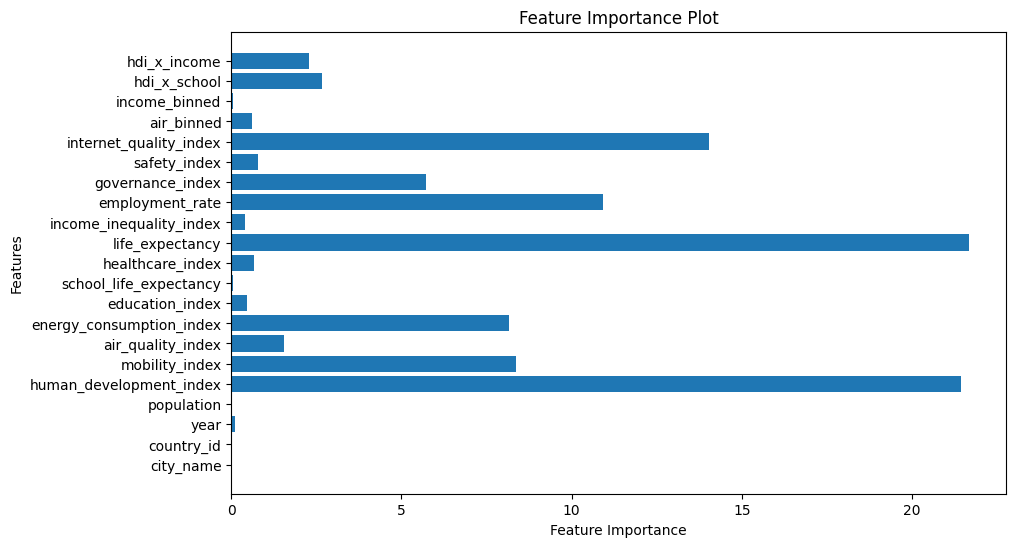

In [524]:
X = train_df.drop(columns=['data_id','city_development_index'])
y = train_df['city_development_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(verbose=0)
model.fit(X_train, y_train)

feature_importance = model.get_feature_importance()

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

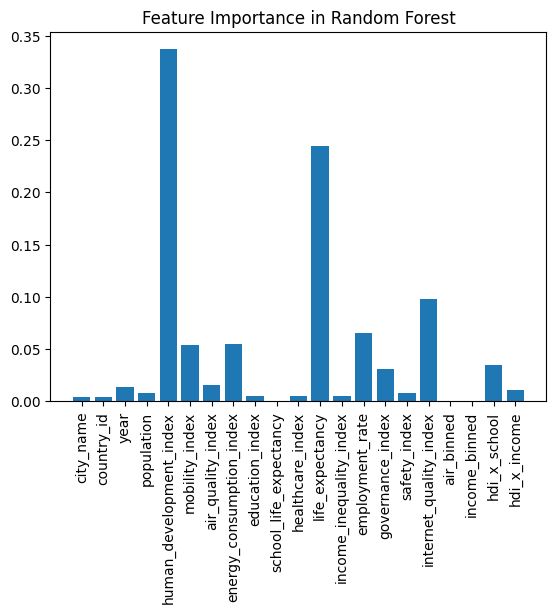

In [525]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X, y)

importance = reg.feature_importances_

plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title("Feature Importance in Random Forest")
plt.show()

In [526]:
num_data = train_df.select_dtypes(include='number')
correlation = num_data.corr()

cdi_corr = correlation['city_development_index']
cdi_corr_filtered = cdi_corr[abs(cdi_corr) > 0.2]
cdi_corr_filtered_sorted = cdi_corr_filtered.sort_values(ascending=False)
cdi_corr_filtered_sorted

city_development_index      1.000000
human_development_index     0.633321
life_expectancy             0.623957
hdi_x_school                0.529149
hdi_x_income                0.508570
governance_index            0.420697
healthcare_index            0.414162
education_index             0.397809
air_quality_index           0.394413
income_inequality_index     0.387489
school_life_expectancy      0.387372
employment_rate             0.362925
internet_quality_index      0.350601
mobility_index              0.345208
safety_index                0.341733
energy_consumption_index    0.265315
year                       -0.399263
Name: city_development_index, dtype: float64

In [527]:
selected_columns = cdi_corr_filtered.index.tolist()
selected_columns.remove('city_development_index')
selected_columns.remove('human_development_index')
selected_columns.remove('life_expectancy')
selected_columns.remove('year')
selected_columns.remove('school_life_expectancy')
selected_columns.remove('hdi_x_school')
selected_columns

['mobility_index',
 'air_quality_index',
 'energy_consumption_index',
 'education_index',
 'healthcare_index',
 'income_inequality_index',
 'employment_rate',
 'governance_index',
 'safety_index',
 'internet_quality_index',
 'hdi_x_income']

In [528]:
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]
testing = testing[selected_columns]

In [529]:
# X = X[selected_columns]
# testing = testing[selected_columns]

We performed feature selection with feature importance from CatBoost and Random Forest models, but the MSE results were still not good enough. We also try to use correlation and try each feature manually so that it can improve the MSE.


### **Normalization**
Normalization is a preprocessing technique used to rescale numeric data to a common scale, typically between 0 and 1. It ensures that all features contribute equally to the analysis and prevents features with larger numeric ranges from dominating those with smaller ranges. Common normalization techniques include Min-Max scaling and Z-score standardization.

In [530]:
# minmax = MinMaxScaler()
# X_train = minmax.fit_transform(X_train)
# X_test = minmax.transform(X_test)
# testing = minmax.transform(testing)

In [531]:
# standard = StandardScaler()
# X_train = standard.fit_transform(X_train)
# X_test = standard.transform(X_test)
# testing = standard.transform(testing)

We tried normalizing the data, and the MSE result was the same as the non-normalized one. Therefore, normalization does not need to be applied.

## **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. It helps uncover patterns, trends, relationships, and anomalies in the data, providing insights that inform further analysis or model building. EDA typically involves tasks such as data visualization, summary statistics, and correlation analysis to understand the nature of the data before applying more complex techniques.

### **Feature and Label Distribution**
Understanding the distribution of features and labels helps identify patterns, trends, and potential anomalies within the data, facilitating better model training and performance.

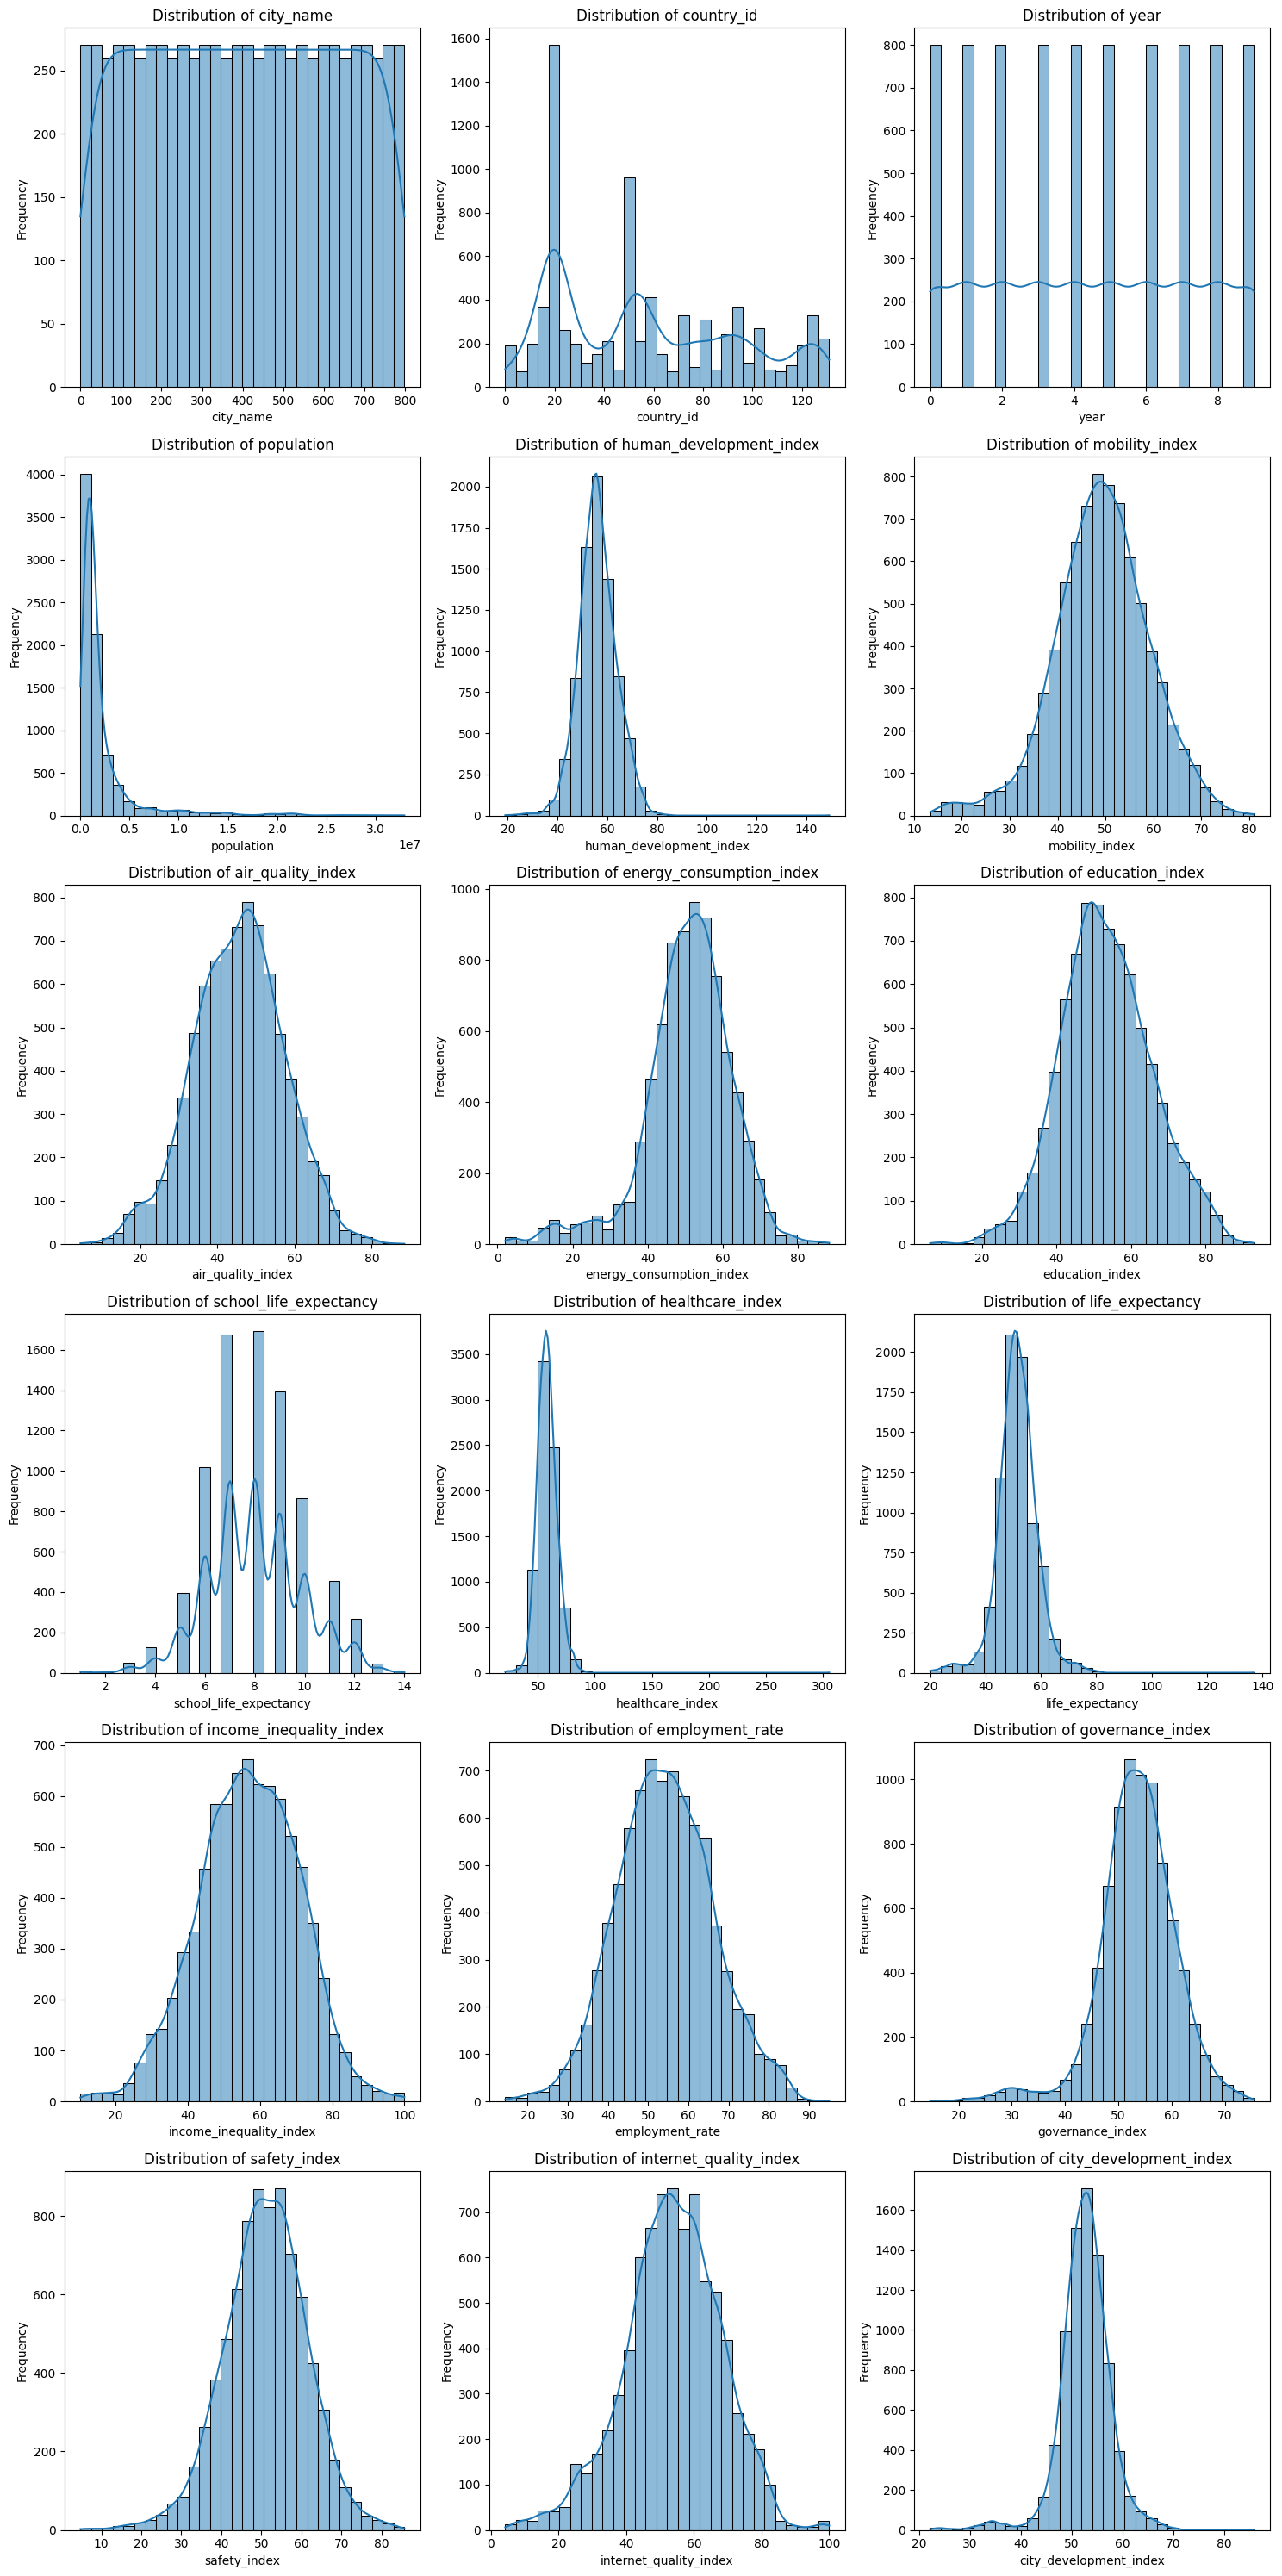

In [532]:
#Distribution before outliers removed
train_without_id = train_outlier_df.drop(columns=['data_id'])
all_features = train_without_id.columns.tolist()
num_cols = 3
num_rows = (len(all_features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(all_features):
    sns.histplot(train_outlier_df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for i in range(len(all_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

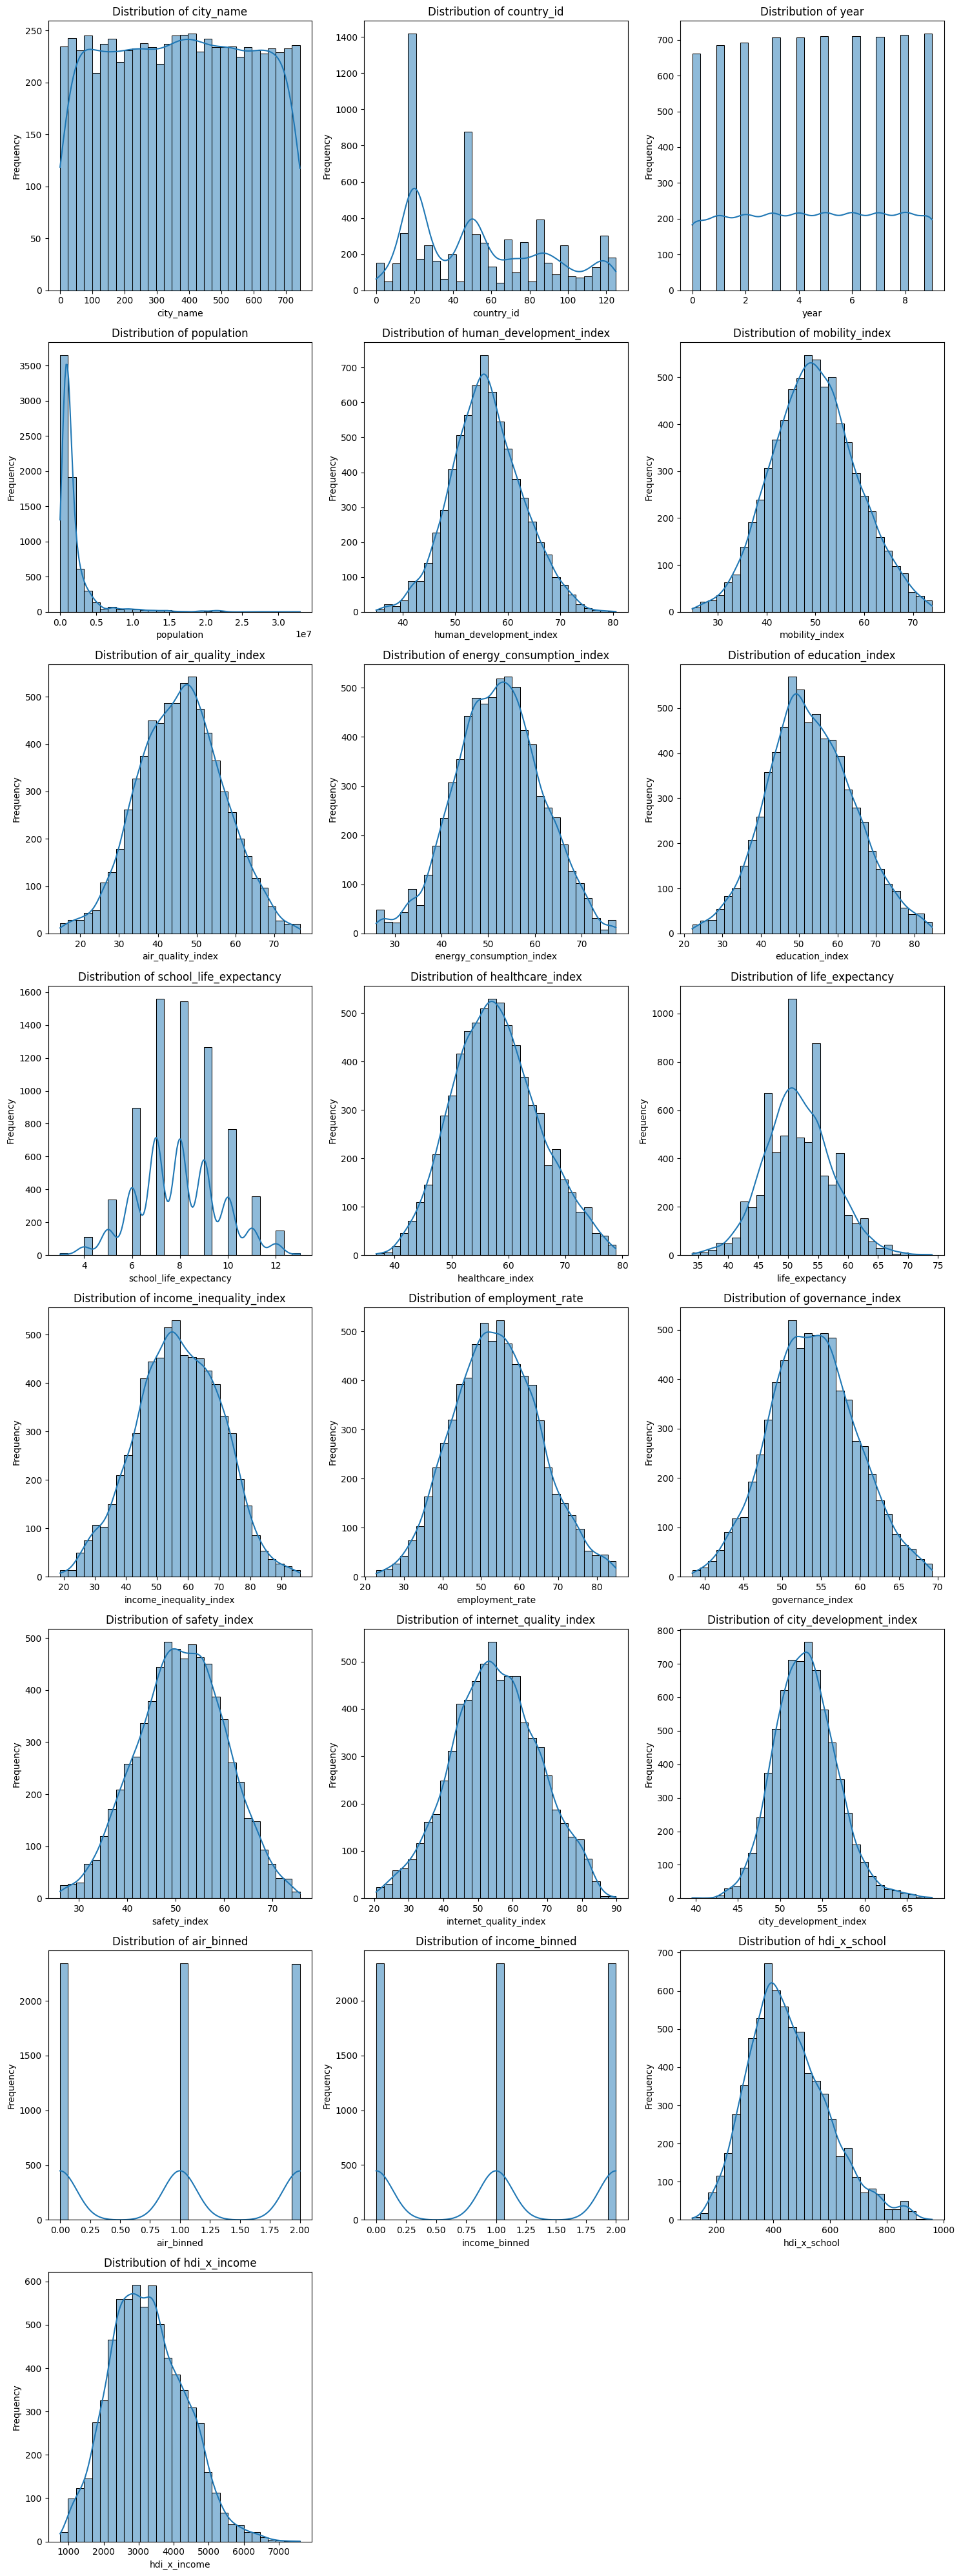

In [533]:
#Distribution after outliers removed
train_without_id = train_df.drop(columns=['data_id'])
all_features = train_without_id.columns.tolist()
num_cols = 3
num_rows = (len(all_features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(all_features):
    sns.histplot(train_df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for i in range(len(all_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Data whose outliers have been removed show a graph with a more normal distribution compared to data that still has many outliers. In Machine Learning, data satisfying Normal Distribution is beneficial for model building. It makes math easier. Models like Linear Regression are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal. 

### **Descriptive Statistics**
Descriptive statistics provide summary insights about the central tendency, dispersion, and shape of the data's distribution, enabling quick comprehension of the data's characteristics.

In [534]:
pd.set_option('display.max_columns', None)
train_df.describe(include='all')

,data_id,city_name,country_id,year,population,human_development_index,mobility_index,air_quality_index,energy_consumption_index,education_index,school_life_expectancy,healthcare_index,life_expectancy,income_inequality_index,employment_rate,governance_index,safety_index,internet_quality_index,city_development_index,air_binned,income_binned,hdi_x_school,hdi_x_income
count,7015,7015.000000,7015.000000,7015.000000,7.015000e+03,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000
unique,7015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C2_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,371.162651,53.305488,4.556094,1.983409e+06,55.966985,49.860321,45.979448,52.136381,53.051718,7.953956,57.874288,51.686386,56.974888,54.027056,53.945991,51.208882,55.025206,53.008925,0.999287,0.999857,452.368724,3251.296470
std,NaN,214.255165,34.091321,2.859102,3.052261e+06,6.749798,8.636713,10.816659,9.144089,11.241114,1.711521,7.491813,5.596218,13.548052,11.130204,5.559830,9.060444,12.588162,3.638626,0.816234,0.816584,138.712380,1058.929823
min,NaN,0.000000,0.000000,0.000000,1.014000e+03,34.960000,24.750000,14.810000,26.020000,22.140000,3.000000,36.750000,34.000000,18.830000,22.810000,38.400000,26.100000,20.560000,39.610000,0.000000,0.000000,114.840000,757.574000
25%,NaN,186.000000,20.000000,2.000000,7.419820e+05,51.460000,43.930000,38.365000,45.980000,45.405000,7.000000,52.505000,48.000000,47.610000,46.145000,50.085000,45.105000,46.370000,50.530000,0.000000,0.000000,354.630000,2479.057250
50%,NaN,372.000000,49.000000,5.000000,1.063113e+06,55.690000,49.640000,46.120000,52.170000,52.390000,8.000000,57.450000,51.000000,56.860000,53.810000,53.820000,51.300000,54.780000,52.890000,1.000000,1.000000,434.980000,3192.705900
75%,NaN,555.000000,81.000000,7.000000,1.877628e+06,60.320000,55.570000,53.230000,58.320000,60.590000,9.000000,62.795000,55.000000,66.825000,61.580000,57.700000,57.525000,63.715000,55.320000,2.000000,2.000000,538.155000,3974.442800


### **Feature Correlation**
Analyzing feature correlations helps identify relationships between variables, which can inform feature selection and improve the model's predictive power.

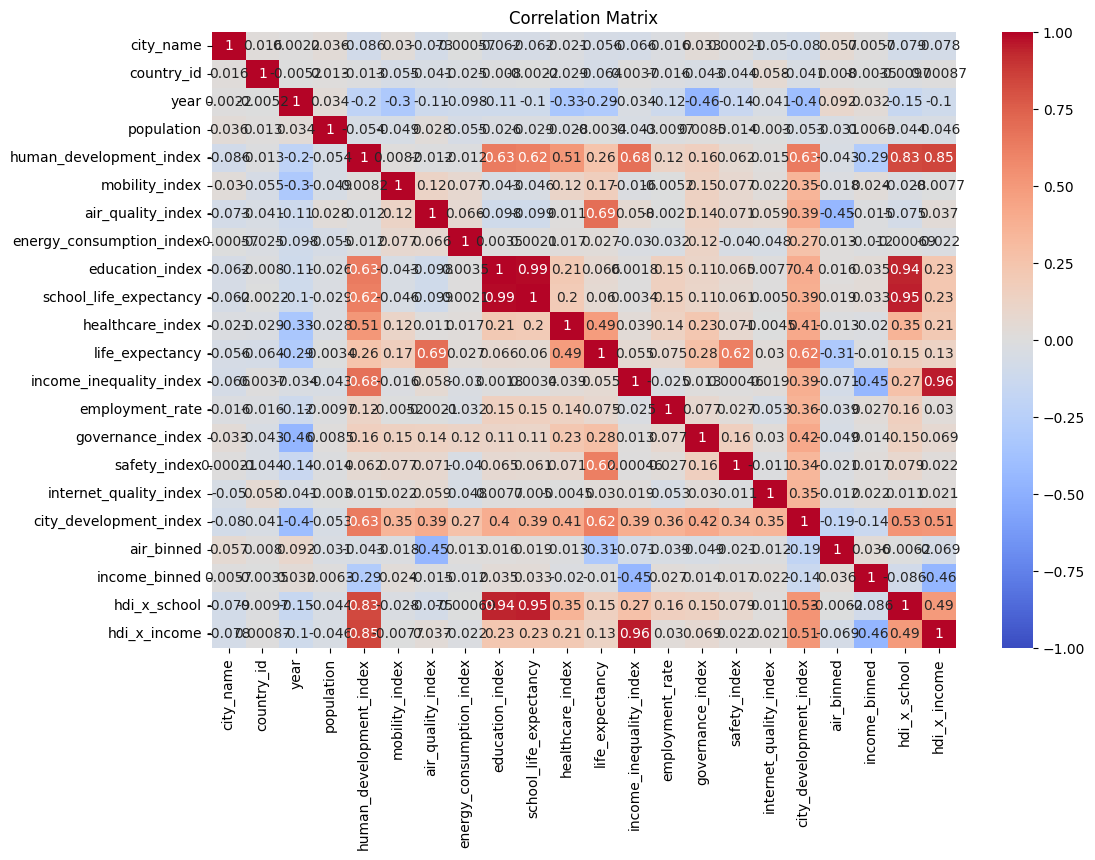

In [535]:
train_without_id = train_df.drop(columns=['data_id'])
all_features = train_without_id.columns.tolist()
plt.figure(figsize=(12, 8))
correlation_matrix = train_df[all_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that some of these features have a positive correlation with the city development index. This correlation indicates that each of these features is significantly related to the city development index.

### **Outlier Identification**
Detecting outliers is crucial for ensuring data quality, as outliers can significantly skew model training and lead to poor generalization.

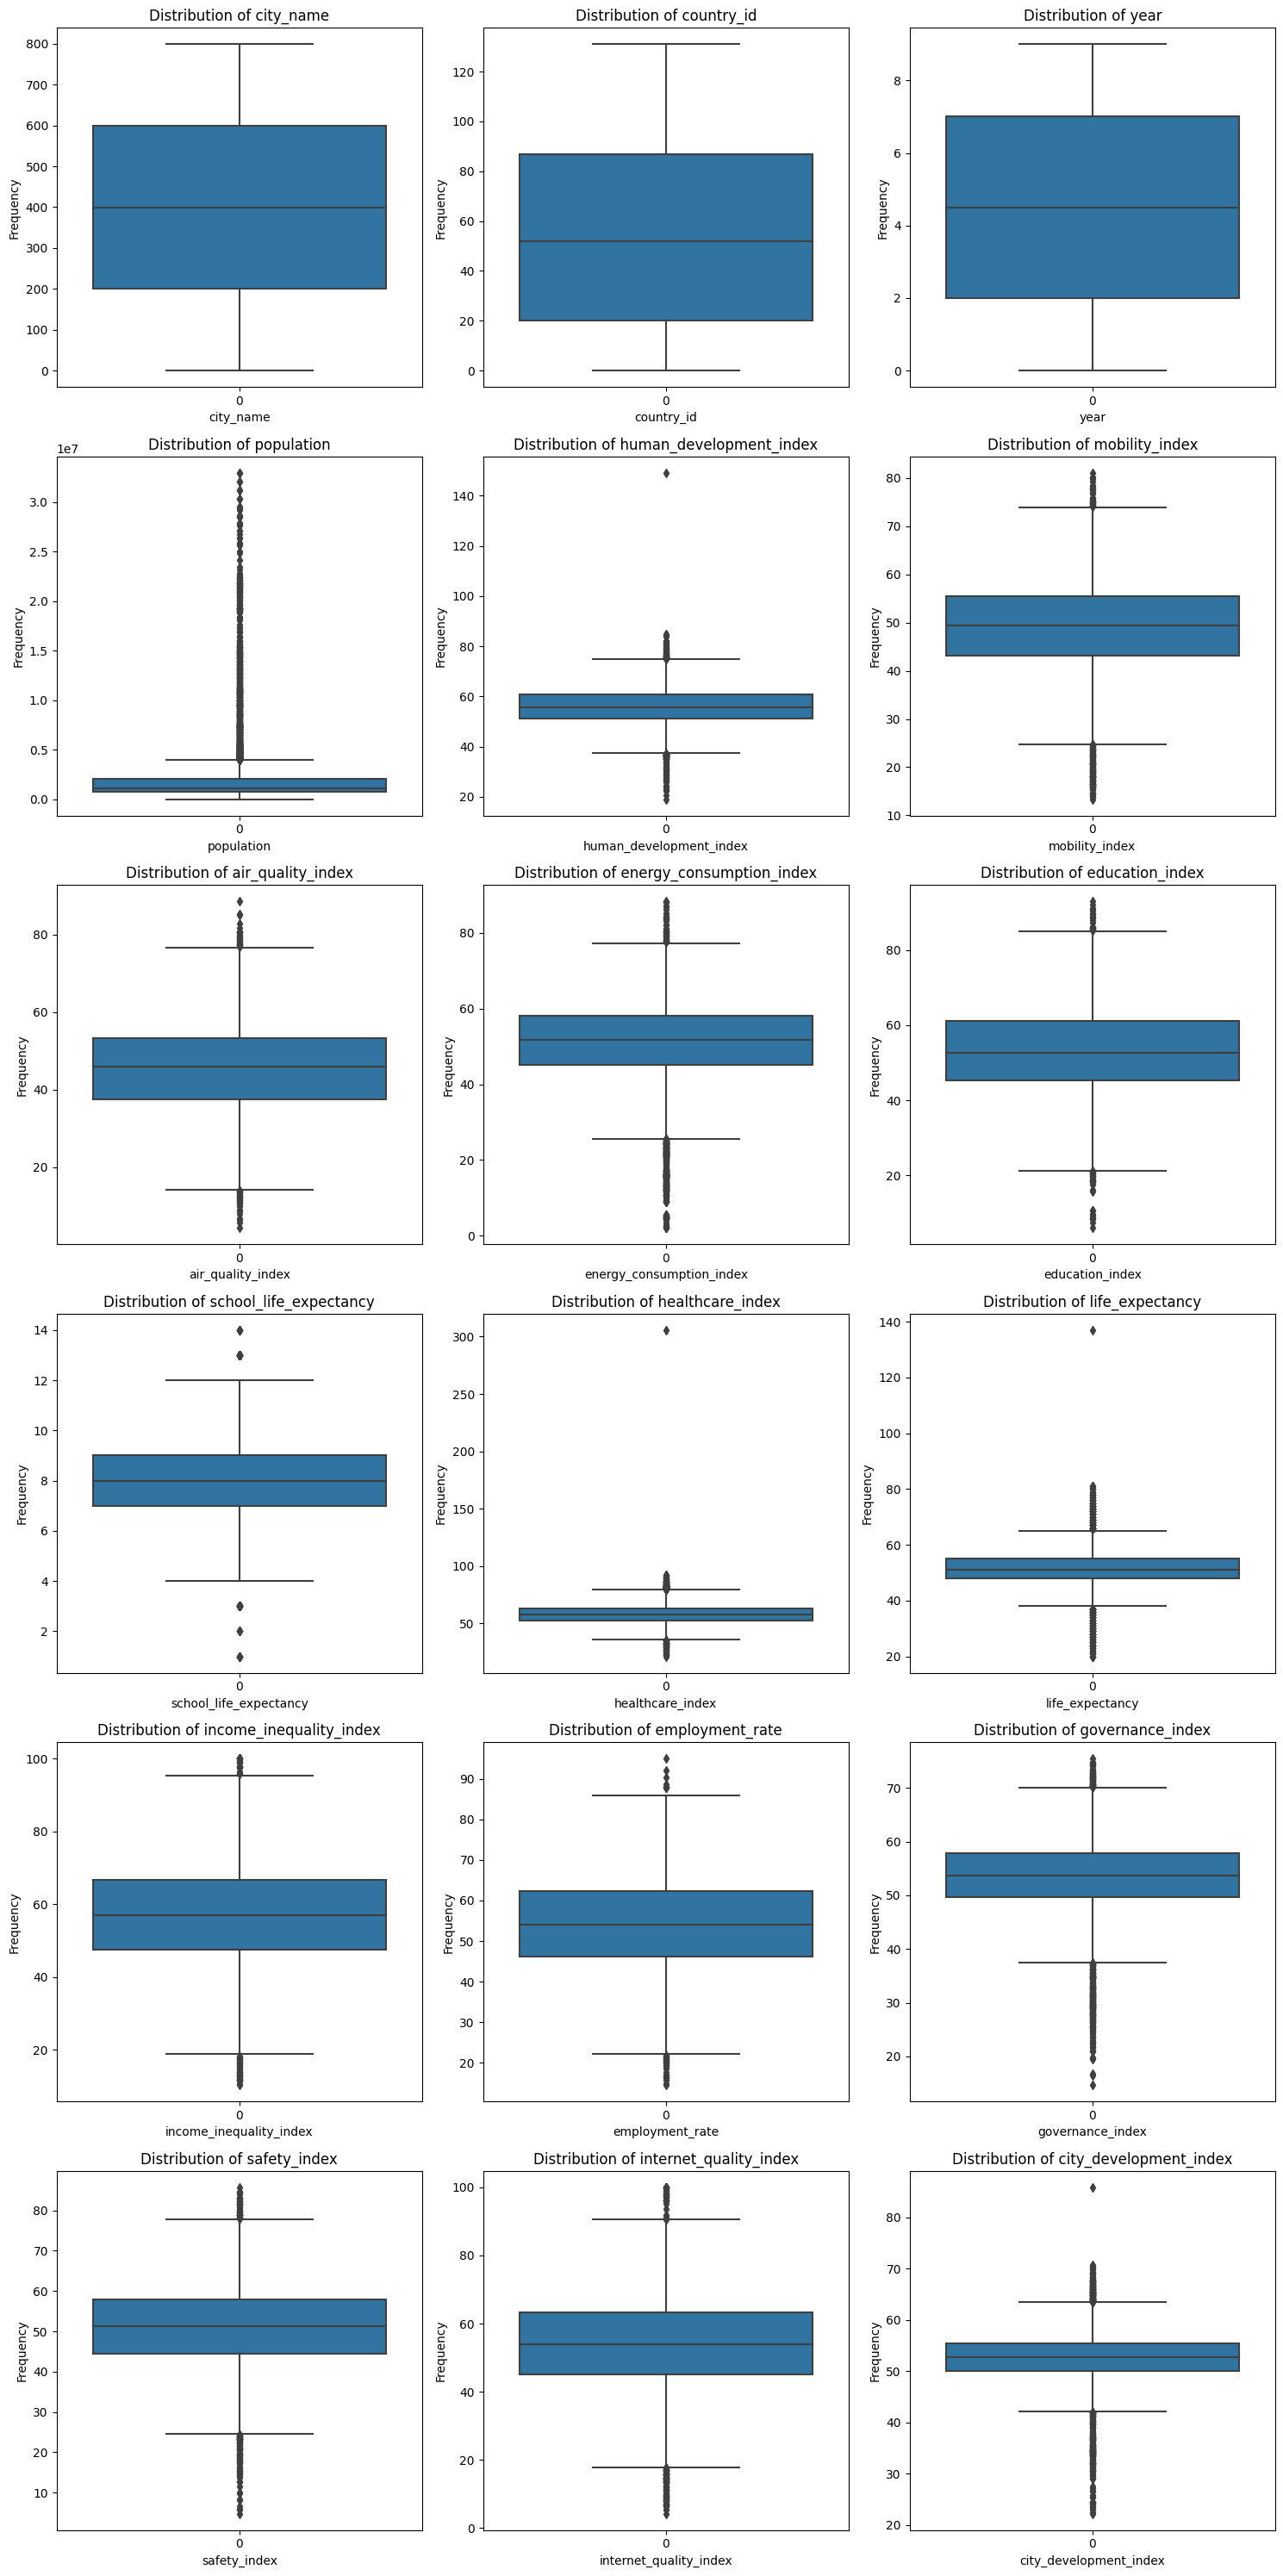

In [536]:
#Data before outliers removed 
train_without_id = train_outlier_df.drop(columns=['data_id'])
all_features = train_without_id.columns.tolist()
num_cols = 3
num_rows = (len(all_features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(all_features):
    sns.boxplot(train_outlier_df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for i in range(len(all_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Based on the boxplot visualizations, several features exhibit a significant number of outliers.

## **Modeling (Regression)**
Modeling in the context of regression involves using statistical techniques to build a predictive model that estimates the relationship between one or more independent variables (predictors) and a dependent variable (target). The goal is to create a function that best fits the data, allowing predictions of the target variable for new data points. Techniques range from simple linear regression to more complex methods like polynomial regression, ridge regression, or machine learning algorithms such as random forests or gradient boosting. Evaluation of regression models typically involves metrics like mean squared error (MSE) or R-squared to assess predictive accuracy.

In [537]:
models = pd.DataFrame(columns=["Model", "MSE"])

### **Linear**

In [538]:
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Linear", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 8.458527531474076e-06


### **Linear (Tuning)**

In [539]:
# linear.get_params()

In [540]:
# param_grid = {
#     'copy_X': [True, False],
#     'fit_intercept': [True, False],
#     'n_jobs': [None, 1, 2],
#     'positive': [True, False]
# }

# grid_search = GridSearchCV(estimator=linear, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on test data: ", mse)

In [541]:
linear_tuning = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)
linear_tuning.fit(X_train, y_train)

y_pred = linear_tuning.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Linear (Tuning)", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 8.458527531474076e-06


### **Ridge**

In [542]:
ridge = Ridge(random_state=0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Ridge", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 8.457735632906031e-06


### **Ridge (Tuning)**

In [543]:
# ridge.get_params()

In [544]:
# param_grid = {
#     'alpha': [1, 0.1, 0.01],
#     'copy_X': [True, False],
#     'fit_intercept': [True, False],
#     'positive': [True, False],
#     'random_state': [0],
#     'solver': ['auto', 'svd', 'sag']
# }

# grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on test data: ", mse)

In [545]:
ridge_tuning = Ridge(random_state=0, alpha=2, copy_X=True, fit_intercept=True, positive=False, solver='auto')
ridge_tuning.fit(X_train, y_train)

y_pred = ridge_tuning.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Ridge (Tuning)", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 8.457915518137806e-06


### **Lasso**

In [546]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Lasso", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 0.11389030344688338


### **Lasso (Tuning)**

In [547]:
# lasso.get_params()

In [548]:
# param_grid = {
#     'alpha': [1, 0.1, 0.01],
#     'copy_X': [True, False],
#     'fit_intercept': [True, False],
#     'positive': [True, False],
#     'precompute': [True, False],
#     'warm_start': [True, False],
#     'random_state': [0],
#     'selection': ['cylic', 'random']
# }

# grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on test data: ", mse)

In [549]:
lasso_tuning = Lasso(alpha=0.01, copy_X=True, fit_intercept=True, positive=False, precompute=True, random_state=0, selection='random', warm_start=True)
lasso_tuning.fit(X_train, y_train)

y_pred = lasso_tuning.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Lasso (Tuning)", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 7.786200214582895e-05


### **ElasticNet**

In [550]:
en = ElasticNet()
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "ElasticNet", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 0.05054647665008656


### **ElasticNet (Tuning)**

In [551]:
# en.get_params()

In [552]:
# param_grid = {
#     'alpha': [1, 0.1, 0.01],
#     'copy_X': [True, False],
#     'fit_intercept': [True, False],
#     'l1_ratio': [1, 0.5, 0.1],
#     'positive': [True, False],
#     'precompute': [True, False],
#     'warm_start': [True, False],
#     'random_state': [0],
#     'selection': ['cylic', 'random']
# }

# grid_search = GridSearchCV(estimator=en, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on test data: ", mse)

In [553]:
en_tuning = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, positive=False, precompute=True, random_state=0, selection='random', warm_start=True)
en_tuning.fit(X_train, y_train)

y_pred = en_tuning.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "ElasticNet (Tuning)", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 6.375123367521883e-05


### **KNN**

In [554]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "KNN", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 3.707237305773343


### **SVM**

In [555]:
svm = SVR()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "SVM", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 9.773146570671786


### **Decision Tree**

In [556]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Decision Tree", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 2.6318875267284385


### **Random Forest**

In [557]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Random Forest", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 0.7577420510691354


### **GBM**

In [558]:
gbm = GradientBoostingRegressor(random_state=0)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "Gradient Boosting", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 0.566273708264615


### **LGBM**

In [559]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "LGBM", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 5612, number of used features: 11
[LightGBM] [Info] Start training from score 52.987945
MSE: 0.32112513728782816


### **HistGBM**

In [560]:
hgbm = HistGradientBoostingRegressor()
hgbm.fit(X_train, y_train)

y_pred = hgbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "HistGBM", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 0.3140236312328239


### **AdaBoost**

In [561]:
ab = AdaBoostRegressor(random_state=0)
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "AdaBoost", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 2.7179099844471835


### **XGBoost**

In [562]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "XGBoost", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MSE: 0.5118972307128451


### **CatBoost**

In [563]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, verbose=100)

y_pred = cb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "CatBoost", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

Learning rate set to 0.05377
0:	learn: 3.5076395	total: 3.21ms	remaining: 3.21s
100:	learn: 0.6100959	total: 262ms	remaining: 2.33s
200:	learn: 0.3058557	total: 520ms	remaining: 2.07s
300:	learn: 0.2247782	total: 774ms	remaining: 1.8s
400:	learn: 0.1857082	total: 1.03s	remaining: 1.53s
500:	learn: 0.1626701	total: 1.28s	remaining: 1.28s
600:	learn: 0.1457975	total: 1.54s	remaining: 1.02s
700:	learn: 0.1327208	total: 1.8s	remaining: 768ms
800:	learn: 0.1225806	total: 2.06s	remaining: 513ms
900:	learn: 0.1142854	total: 2.36s	remaining: 260ms
999:	learn: 0.1074479	total: 2.63s	remaining: 0us
MSE: 0.039154557401993625


### **CatBoost Tuning**

In [564]:
# cb.get_params()

In [565]:
# param_grid = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8]
# }

# grid_search = GridSearchCV(estimator=cb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=100)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train, verbose=100)

# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on test data: ", mse)

In [566]:
cb_tuning = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=5)
cb_tuning.fit(X_train, y_train, verbose=100)

y_pred = cb_tuning.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "CatBoost (Tuning)", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

0:	learn: 3.4346039	total: 2.44ms	remaining: 2.44s
100:	learn: 0.3824623	total: 202ms	remaining: 1.8s
200:	learn: 0.2422942	total: 422ms	remaining: 1.68s
300:	learn: 0.1941533	total: 626ms	remaining: 1.45s
400:	learn: 0.1673331	total: 817ms	remaining: 1.22s
500:	learn: 0.1486711	total: 1.01s	remaining: 1s
600:	learn: 0.1342147	total: 1.2s	remaining: 796ms
700:	learn: 0.1229149	total: 1.39s	remaining: 594ms
800:	learn: 0.1134186	total: 1.59s	remaining: 395ms
900:	learn: 0.1054951	total: 1.78s	remaining: 196ms
999:	learn: 0.0986523	total: 1.97s	remaining: 0us
MSE: 0.0327556103768591


### **NGBoost**

In [567]:
ngb = NGBRegressor()
ngb.fit(X_train, y_train)

y_pred = ngb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

new_row = {"Model": "NGBoost", "MSE": mse}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

[iter 0] loss=2.7036 val_loss=0.0000 scale=1.0000 norm=2.9357
[iter 100] loss=2.3675 val_loss=0.0000 scale=1.0000 norm=2.1455
[iter 200] loss=2.1090 val_loss=0.0000 scale=1.0000 norm=1.6742
[iter 300] loss=1.8624 val_loss=0.0000 scale=1.0000 norm=1.3514
[iter 400] loss=1.6337 val_loss=0.0000 scale=1.0000 norm=1.1294
MSE: 1.5947764741557755


### **Evaluation**

In [568]:
models.sort_values(by="MSE", ascending=True).reset_index(drop=True)

,Model,MSE
0,Ridge,0.000008
1,Ridge (Tuning),0.000008
2,Linear,0.000008
3,Linear (Tuning),0.000008
4,ElasticNet (Tuning),0.000064
5,Lasso (Tuning),0.000078
6,CatBoost (Tuning),0.032756
7,CatBoost,0.039155
8,ElasticNet,0.050546
9,Lasso,0.113890


<Axes: xlabel='MSE', ylabel='Model'>

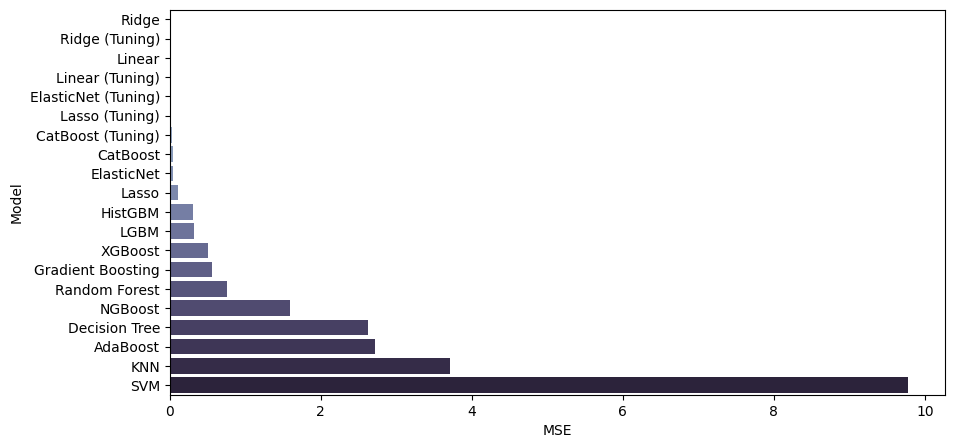

In [569]:
plt.figure(figsize=[10,5])
sns.barplot(palette="ch:s=.25,rot=-.25", x='MSE', y='Model',data=models.sort_values('MSE'))

Experiments were conducted using various commonly used regression methods. From the experimental results, 5 best models were obtained by fine tuning, including Ridge, Linear, ElasticNet, Lasso, and CatBoost, with the best MSE value being 8.707713219334749e-06 using Ridge with tuning.

### **Analysis With SHAP**
SHAP is a framework used to interpret the output of machine learning models. Unlike other methods, SHAP gives us a detailed understanding of how each feature contributes to predictions.

PermutationExplainer explainer: 2001it [00:27, 44.94it/s]                          


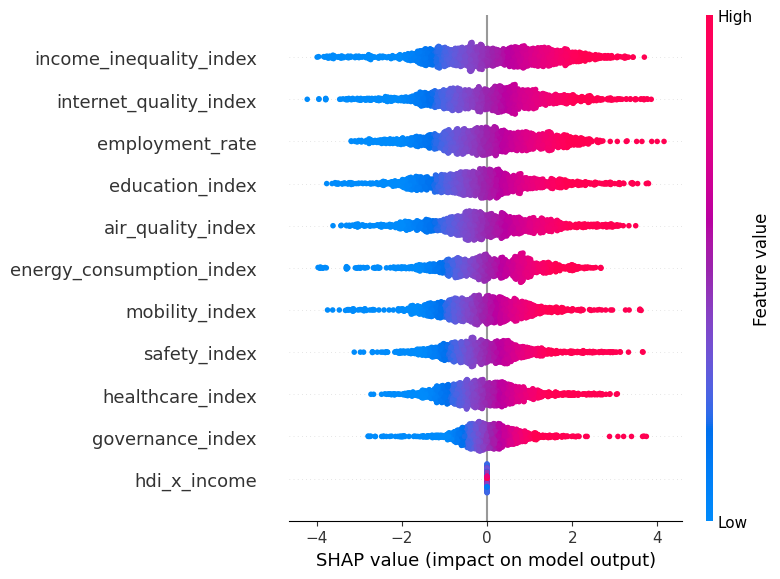

In [570]:
explainer = shap.Explainer(linear.predict, testing)
shap_values = explainer.shap_values(testing)

shap.summary_plot(shap_values, testing)

## **Result**

Model results are applied to test data for submission.

In [571]:
prediction = linear.predict(testing)

In [572]:
output = pd.DataFrame({'data_id': test_df['data_id'], 'city_development_index' : prediction})
output.to_csv('submission.csv', index=False)
output

,data_id,city_development_index
0,C801_2014,49.642674
1,C802_2014,55.866808
2,C803_2014,59.007291
3,C804_2014,50.087444
4,C805_2014,54.730800
...,...,...
1995,C996_2023,52.445675
1996,C997_2023,53.654881
1997,C998_2023,53.141552
1998,C999_2023,50.975826


## **Conclusion**
- There are significant outliers in the data, so outliers need to be removed to improve the accuracy of the model.
- After conducting feature selection and experiments, the best features for prediction are 'mobility_index', 'air_quality_index', 'energy_consumption_index', 'education_index', 'healthcare_index', 'income_inequality_index', 'employment_rate', 'governance_index', 'safety_index', 'internet_quality_index', 'hdi_x_income'.
- Ridge and Linear Regression is the model that obtained the best MSE value compared to other models, with a value of 8.707713219334749e-06

## Suggestion
- Analyze existing outlier data and conduct further experiments on the best outlier removal method.

## 